<a href="https://colab.research.google.com/github/banhdepchai/IS254.O11-DSS/blob/main/03_19521061_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Import thư viện

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import StratifiedKFold

# machine learning algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC


from scipy import stats
import warnings
warnings.filterwarnings('ignore')

## Import dataset

In [ ]:
# loading the dataset
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DSS/heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
df.shape

(1025, 14)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [ ]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## Làm sạch, chia tỷ lệ và mã hoá dữ liệu

In [ ]:
#data cleaning, scaling and encoding
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [ ]:
df.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved',
              'exercise_induced_angina', 'st_depression', 'st_slope','ca','thalassemia','target']

In [ ]:
df.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,ca,thalassemia,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
# converting features to categorical features
df['chest_pain_type'][df['chest_pain_type'] == 0] = 'typical angina '
df['chest_pain_type'][df['chest_pain_type'] == 1] = 'atypical angina'
df['chest_pain_type'][df['chest_pain_type'] == 2] = 'non-angina pain'
df['chest_pain_type'][df['chest_pain_type'] == 3] = 'asymptomatic'

df['rest_ecg'][df['rest_ecg'] == 0] = 'normal'
df['rest_ecg'][df['rest_ecg'] == 1] = 'Abnormality in ST-T wave'
df['rest_ecg'][df['rest_ecg'] == 2] = 'left ventricular hypertrophy'

df['st_slope'][df['st_slope'] == 0] = 'upsloping'
df['st_slope'][df['st_slope'] == 1] = 'flat'
df['st_slope'][df['st_slope'] == 2] = 'downsloping'

df['thalassemia'][df['thalassemia'] == 0] = 'null'
df['thalassemia'][df['thalassemia'] == 1] = 'fixed defect'
df['thalassemia'][df['thalassemia'] == 2] = 'normal blood flow'
df['thalassemia'][df['thalassemia'] == 3] = 'reversible defect'

df["sex"] = df.sex.apply(lambda  x:'male' if x==1 else 'female')

In [ ]:
df['chest_pain_type'].value_counts()

typical angina     497
non-angina pain    284
atypical angina    167
asymptomatic        77
Name: chest_pain_type, dtype: int64

In [ ]:
df['rest_ecg'].value_counts()

Abnormality in ST-T wave        513
normal                          497
left ventricular hypertrophy     15
Name: rest_ecg, dtype: int64

In [ ]:
df['st_slope'].value_counts()

flat           482
downsloping    469
upsloping       74
Name: st_slope, dtype: int64

In [ ]:
df['thalassemia'].value_counts()

normal blood flow    544
reversible defect    410
fixed defect          64
null                   7
Name: thalassemia, dtype: int64

In [ ]:
# checking the  dataset after  encoding
df.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,ca,thalassemia,target
0,52,male,typical angina,125,212,0,Abnormality in ST-T wave,168,0,1.0,downsloping,2,reversible defect,0
1,53,male,typical angina,140,203,1,normal,155,1,3.1,upsloping,0,reversible defect,0
2,70,male,typical angina,145,174,0,Abnormality in ST-T wave,125,1,2.6,upsloping,0,reversible defect,0
3,61,male,typical angina,148,203,0,Abnormality in ST-T wave,161,0,0.0,downsloping,1,reversible defect,0
4,62,female,typical angina,138,294,1,Abnormality in ST-T wave,106,0,1.9,flat,3,normal blood flow,0


In [ ]:
# Checking missing entries in the dataset columnwise
df.isna().sum()

age                        0
sex                        0
chest_pain_type            0
resting_blood_pressure     0
cholesterol                0
fasting_blood_sugar        0
rest_ecg                   0
max_heart_rate_achieved    0
exercise_induced_angina    0
st_depression              0
st_slope                   0
ca                         0
thalassemia                0
target                     0
dtype: int64

In [ ]:
# checking the shape of the dataset
df.shape

(1025, 14)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      1025 non-null   int64  
 1   sex                      1025 non-null   object 
 2   chest_pain_type          1025 non-null   object 
 3   resting_blood_pressure   1025 non-null   int64  
 4   cholesterol              1025 non-null   int64  
 5   fasting_blood_sugar      1025 non-null   int64  
 6   rest_ecg                 1025 non-null   object 
 7   max_heart_rate_achieved  1025 non-null   int64  
 8   exercise_induced_angina  1025 non-null   int64  
 9   st_depression            1025 non-null   float64
 10  st_slope                 1025 non-null   object 
 11  ca                       1025 non-null   int64  
 12  thalassemia              1025 non-null   object 
 13  target                   1025 non-null   int64  
dtypes: float64(1), int64(8),

In [ ]:
df.describe(include =[np.number])

,age,resting_blood_pressure,cholesterol,fasting_blood_sugar,max_heart_rate_achieved,exercise_induced_angina,st_depression,ca,target
count,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,131.611707,246.00000,0.149268,149.114146,0.336585,1.071512,0.754146,0.513171
std,9.072290,17.516718,51.59251,0.356527,23.005724,0.472772,1.175053,1.030798,0.500070
min,29.000000,94.000000,126.00000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,120.000000,211.00000,0.000000,132.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,130.000000,240.00000,0.000000,152.000000,0.000000,0.800000,0.000000,1.000000
75%,61.000000,140.000000,275.00000,0.000000,166.000000,1.000000,1.800000,1.000000,1.000000
max,77.000000,200.000000,564.00000,1.000000,202.000000,1.000000,6.200000,4.000000,1.000000


In [ ]:
df.describe(include =[np.object])

,sex,chest_pain_type,rest_ecg,st_slope,thalassemia
count,1025,1025,1025,1025,1025
unique,2,4,3,3,4
top,male,typical angina,Abnormality in ST-T wave,flat,normal blood flow
freq,713,497,513,482,544


## Phân bố bệnh tim dựa trên biến mục tiêu

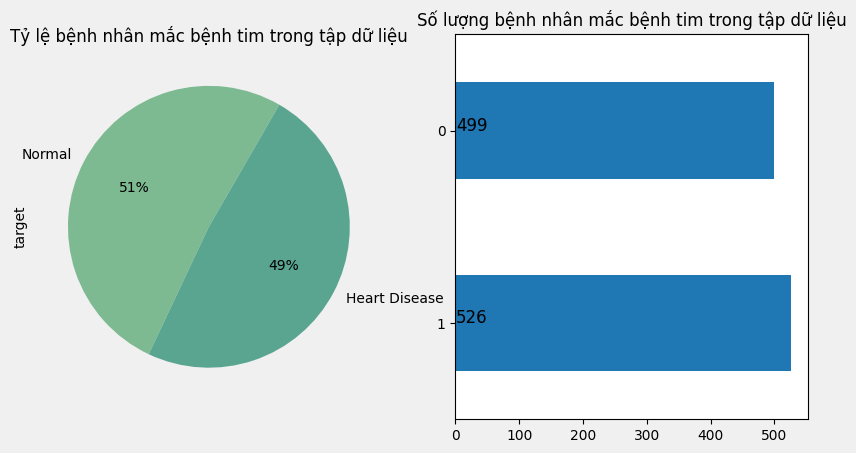

In [ ]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharey=False, figsize=(10,5),facecolor=(.94, .94, .94))


ax1 = df['target'].value_counts().plot.pie( x ="Heart disease" ,y ='no.of patients',
                   autopct = "%1.0f%%",labels=["Normal","Heart Disease"], startangle = 60,ax=ax1,colors = sns.color_palette("crest"));
ax1.set(title = 'Tỷ lệ bệnh nhân mắc bệnh tim trong tập dữ liệu')

ax2 = df["target"].value_counts().plot(kind="barh",ax =ax2)
for x,y in enumerate(df["target"].value_counts().values):
    ax2.text(.5,x,y,fontsize=12)
ax2.set(title = 'Số lượng bệnh nhân mắc bệnh tim trong tập dữ liệu')
plt.show()

## Phân bố bệnh tim theo giới tính và tuổi tác

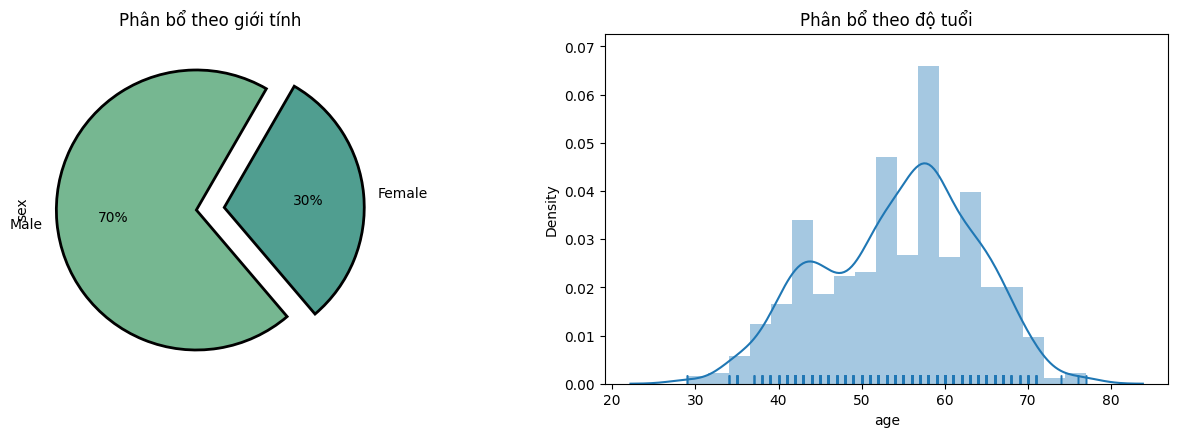

In [ ]:
plt.figure(figsize=(16,10))
plt.subplot(221)
df["sex"].value_counts().plot.pie(autopct = "%1.0f%%",colors = sns.color_palette("crest",5), startangle = 60,labels=["Male","Female"],
wedgeprops={"linewidth":2,"edgecolor":"k"},explode=[.1,.1],shadow =False)
plt.title("Phân bổ theo giới tính")
plt.subplot(222)
ax= sns.distplot(df['age'], rug=True)
plt.title("Phân bổ theo độ tuổi")
plt.show()

Như chúng ta có thể thấy từ biểu đồ trên, trong tập dữ liệu này tỷ lệ nam giới cao hơn nhiều so với nữ giới khi độ tuổi trung bình của bệnh nhân là khoảng 60.

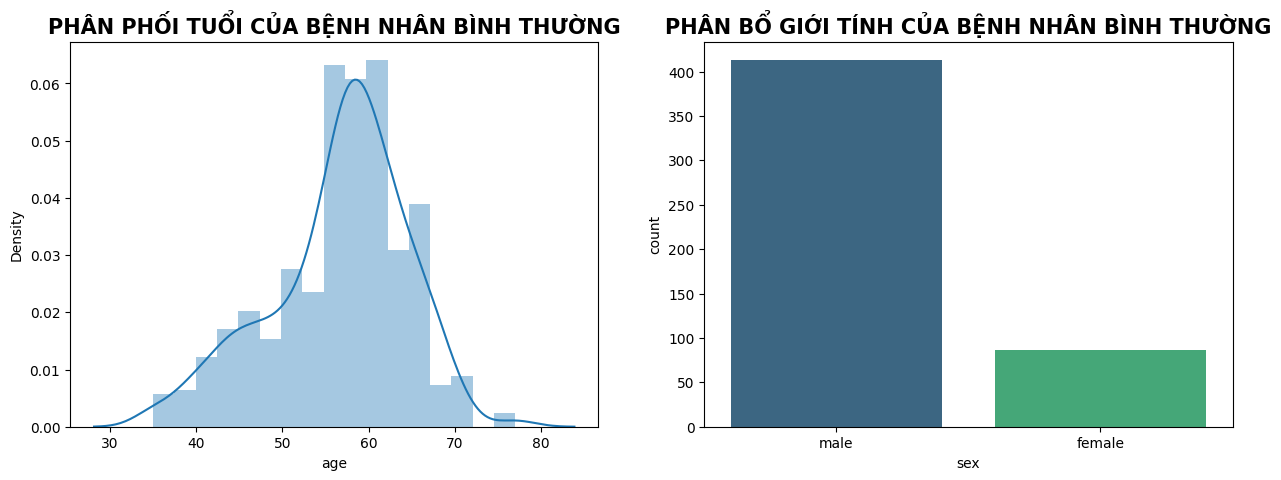

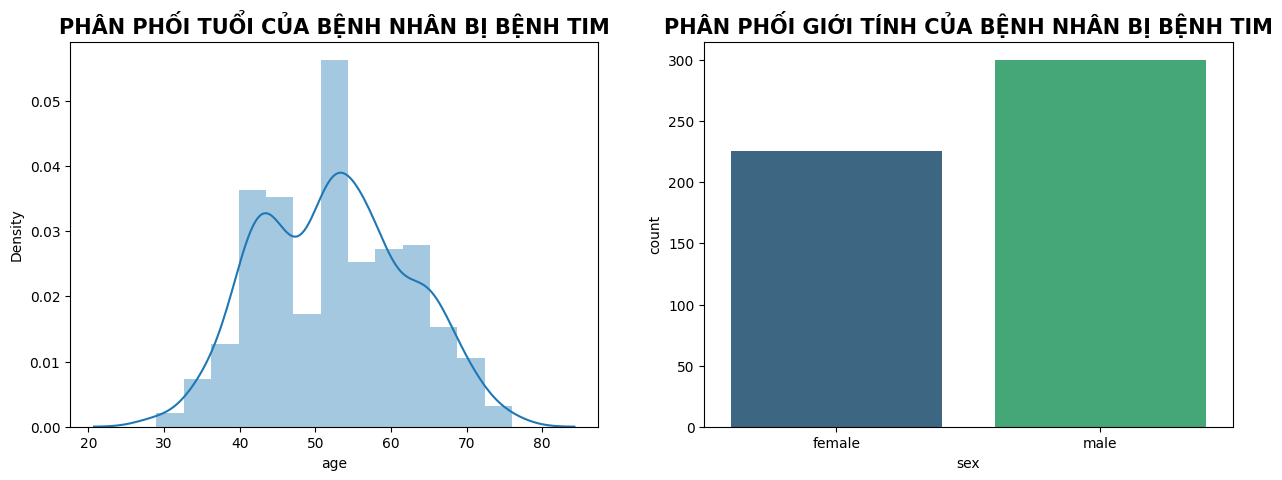

In [ ]:
df_1=df[df['target']==1]

df_0=df[df['target']==0]

# plotting normal patients
fig = plt.figure(figsize=(15,5))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.distplot(df_0['age'])
plt.title('PHÂN PHỐI TUỔI CỦA BỆNH NHÂN BÌNH THƯỜNG', fontsize=15, weight='bold')

ax1 = plt.subplot2grid((1,2),(0,1))
sns.countplot(x =df_0['sex'], palette='viridis')
plt.title('PHÂN BỔ GIỚI TÍNH CỦA BỆNH NHÂN BÌNH THƯỜNG', fontsize=15, weight='bold' )
plt.show()

#plotting heart patients

fig = plt.figure(figsize=(15,5))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.distplot(df_1['age'])
plt.title('PHÂN PHỐI TUỔI CỦA BỆNH NHÂN BỊ BỆNH TIM', fontsize=15, weight='bold')

ax1 = plt.subplot2grid((1,2),(0,1))
sns.countplot(x=df_1['sex'], palette='viridis')
plt.title('PHÂN PHỐI GIỚI TÍNH CỦA BỆNH NHÂN BỊ BỆNH TIM', fontsize=15, weight='bold' )
plt.show()

## Phân bố loại đau ngực

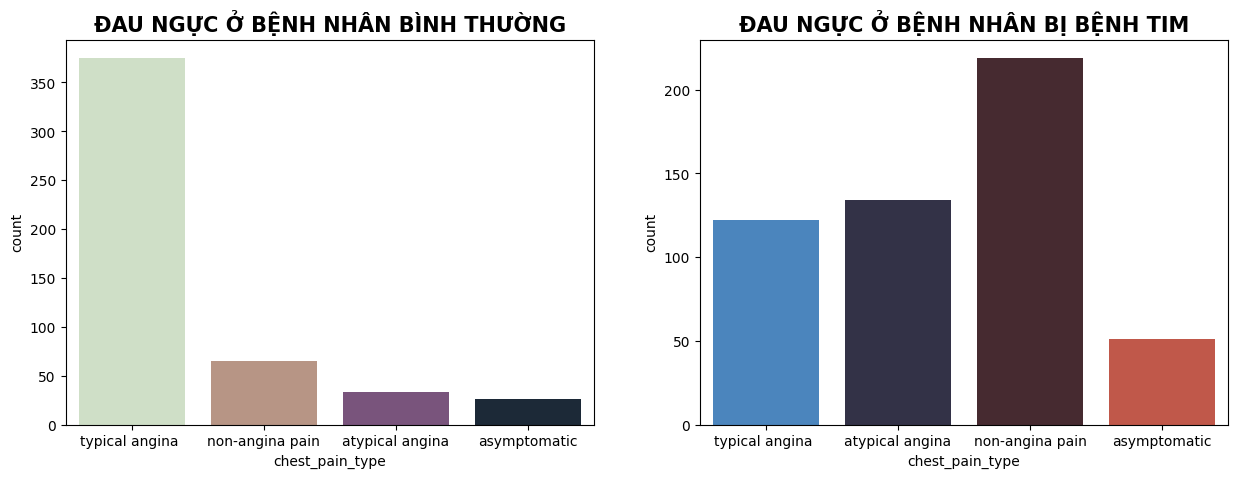

In [ ]:
# plotting normal patients
fig = plt.figure(figsize=(15,5))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.countplot(x =df_0['chest_pain_type'],palette = 'ch:start=4.2,rot=-3.3')
plt.title('ĐAU NGỰC Ở BỆNH NHÂN BÌNH THƯỜNG', fontsize=15, weight='bold')

#plotting heart patients
ax1 = plt.subplot2grid((1,2),(0,1))
sns.countplot(x =df_1['chest_pain_type'], palette='icefire')
plt.title('ĐAU NGỰC Ở BỆNH NHÂN BỊ BỆNH TIM', fontsize=15, weight='bold' )
plt.show()

In [ ]:
plot_criteria= ['chest_pain_type', 'target']
cm = sns.light_palette("green", as_cmap=True)
(round(pd.crosstab(df[plot_criteria[0]], df[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

target,0,1
chest_pain_type,,
asymptomatic,5.210000,9.700000
atypical angina,6.610000,25.480000
non-angina pain,13.030000,41.630000
typical angina,75.150000,23.190000


## Phân bố điện tâm đồ nghỉ (Rest ECG)

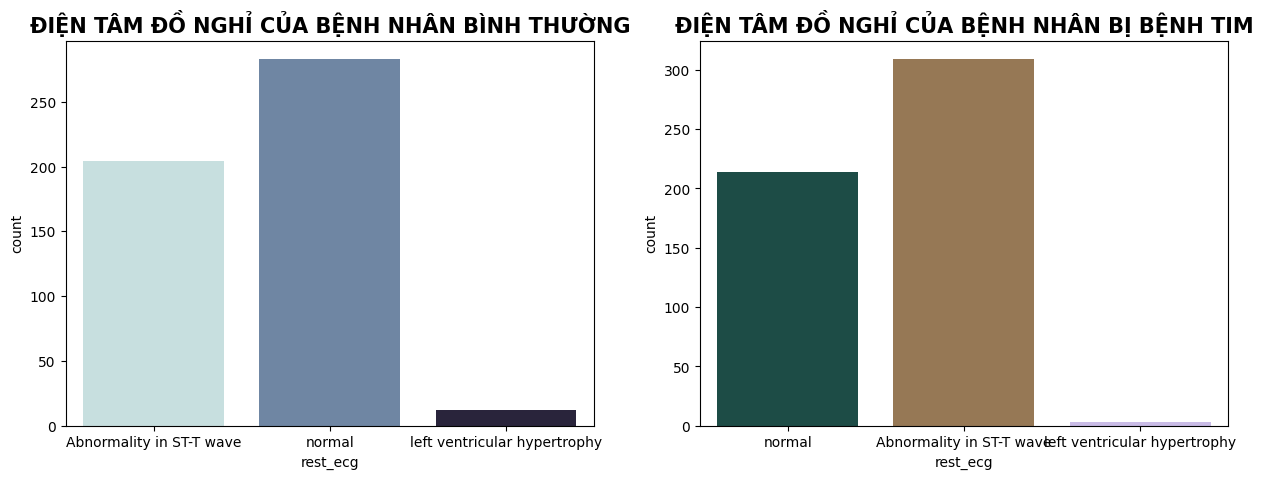

In [ ]:
# plotting normal patients
fig = plt.figure(figsize=(15,5))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.countplot(x =df_0['rest_ecg'], palette ='ch:start=.2,rot=-.3')
plt.title('ĐIỆN TÂM ĐỒ NGHỈ CỦA BỆNH NHÂN BÌNH THƯỜNG', fontsize=15, weight='bold')

#plotting heart patients
ax1 = plt.subplot2grid((1,2),(0,1))
sns.countplot(x =df_1['rest_ecg'], palette='cubehelix')
plt.title('ĐIỆN TÂM ĐỒ NGHỈ CỦA BỆNH NHÂN BỊ BỆNH TIM', fontsize=15, weight='bold' )
plt.show()

In [ ]:
# Nghiên cứu các bệnh nhân mắc bệnh tim mạch dựa trên điện tâm đồ nghỉ
plot_criteria= ['rest_ecg', 'target']
cm = sns.light_palette("white", as_cmap=True)
(round(pd.crosstab(df[plot_criteria[0]], df[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

target,0,1
rest_ecg,,
Abnormality in ST-T wave,40.880000,58.750000
left ventricular hypertrophy,2.400000,0.570000
normal,56.710000,40.680000


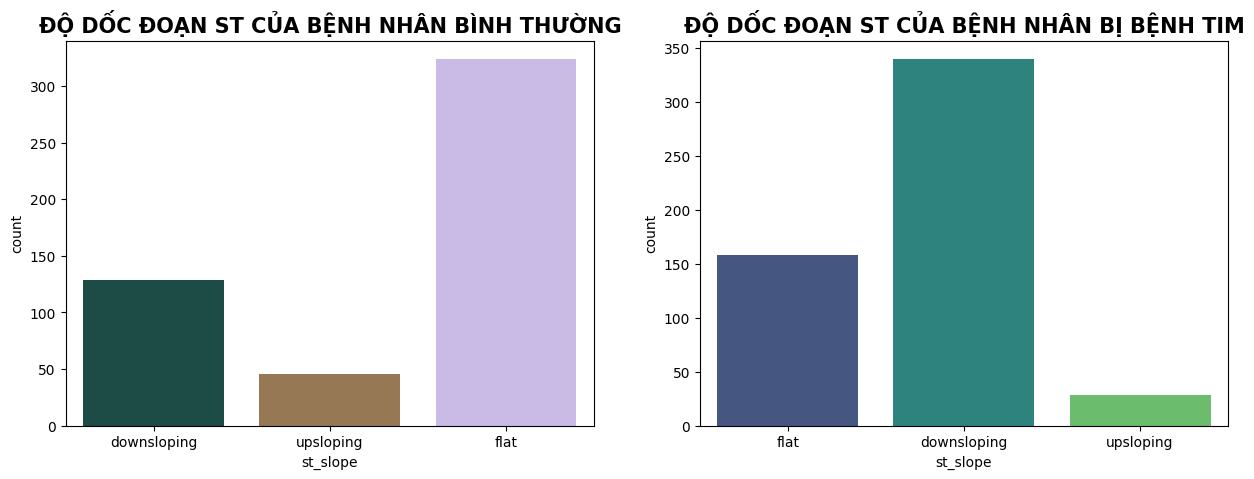

In [ ]:
# plotting normal patients
fig = plt.figure(figsize=(15,5))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.countplot(x =df_0['st_slope'],palette='cubehelix')
plt.title('ĐỘ DỐC ĐOẠN ST CỦA BỆNH NHÂN BÌNH THƯỜNG', fontsize=15, weight='bold')

#plotting heart patients
ax1 = plt.subplot2grid((1,2),(0,1))
sns.countplot(x =df_1['st_slope'], palette='viridis')
plt.title('ĐỘ DỐC ĐOẠN ST CỦA BỆNH NHÂN BỊ BỆNH TIM', fontsize=15, weight='bold' )
plt.show()

In [ ]:
plot_criteria= ['st_slope', 'target']
cm = sns.light_palette("green", as_cmap=True)
(round(pd.crosstab(df[plot_criteria[0]], df[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

target,0,1
st_slope,,
downsloping,25.850000,64.640000
flat,64.930000,30.040000
upsloping,9.220000,5.320000


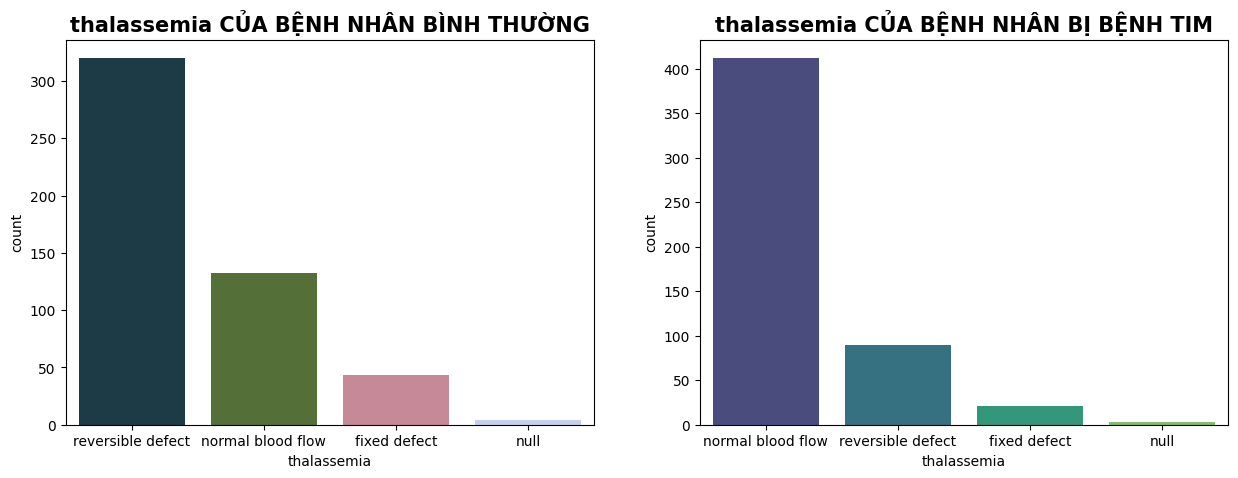

In [ ]:
fig = plt.figure(figsize=(15,5))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.countplot(x =df_0['thalassemia'],palette='cubehelix')
plt.title('thalassemia CỦA BỆNH NHÂN BÌNH THƯỜNG', fontsize=15, weight='bold')

#plotting heart patients
ax1 = plt.subplot2grid((1,2),(0,1))
sns.countplot(x =df_1['thalassemia'], palette='viridis')
plt.title('thalassemia CỦA BỆNH NHÂN BỊ BỆNH TIM', fontsize=15, weight='bold' )
plt.show()

In [ ]:
plot_criteria= ['thalassemia', 'target']
cm = sns.light_palette("green", as_cmap=True)
(round(pd.crosstab(df[plot_criteria[0]], df[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

target,0,1
thalassemia,,
fixed defect,8.620000,3.990000
normal blood flow,26.450000,78.330000
null,0.800000,0.570000
reversible defect,64.130000,17.110000


## Phân bố các đặc trưng số (Numerical features)

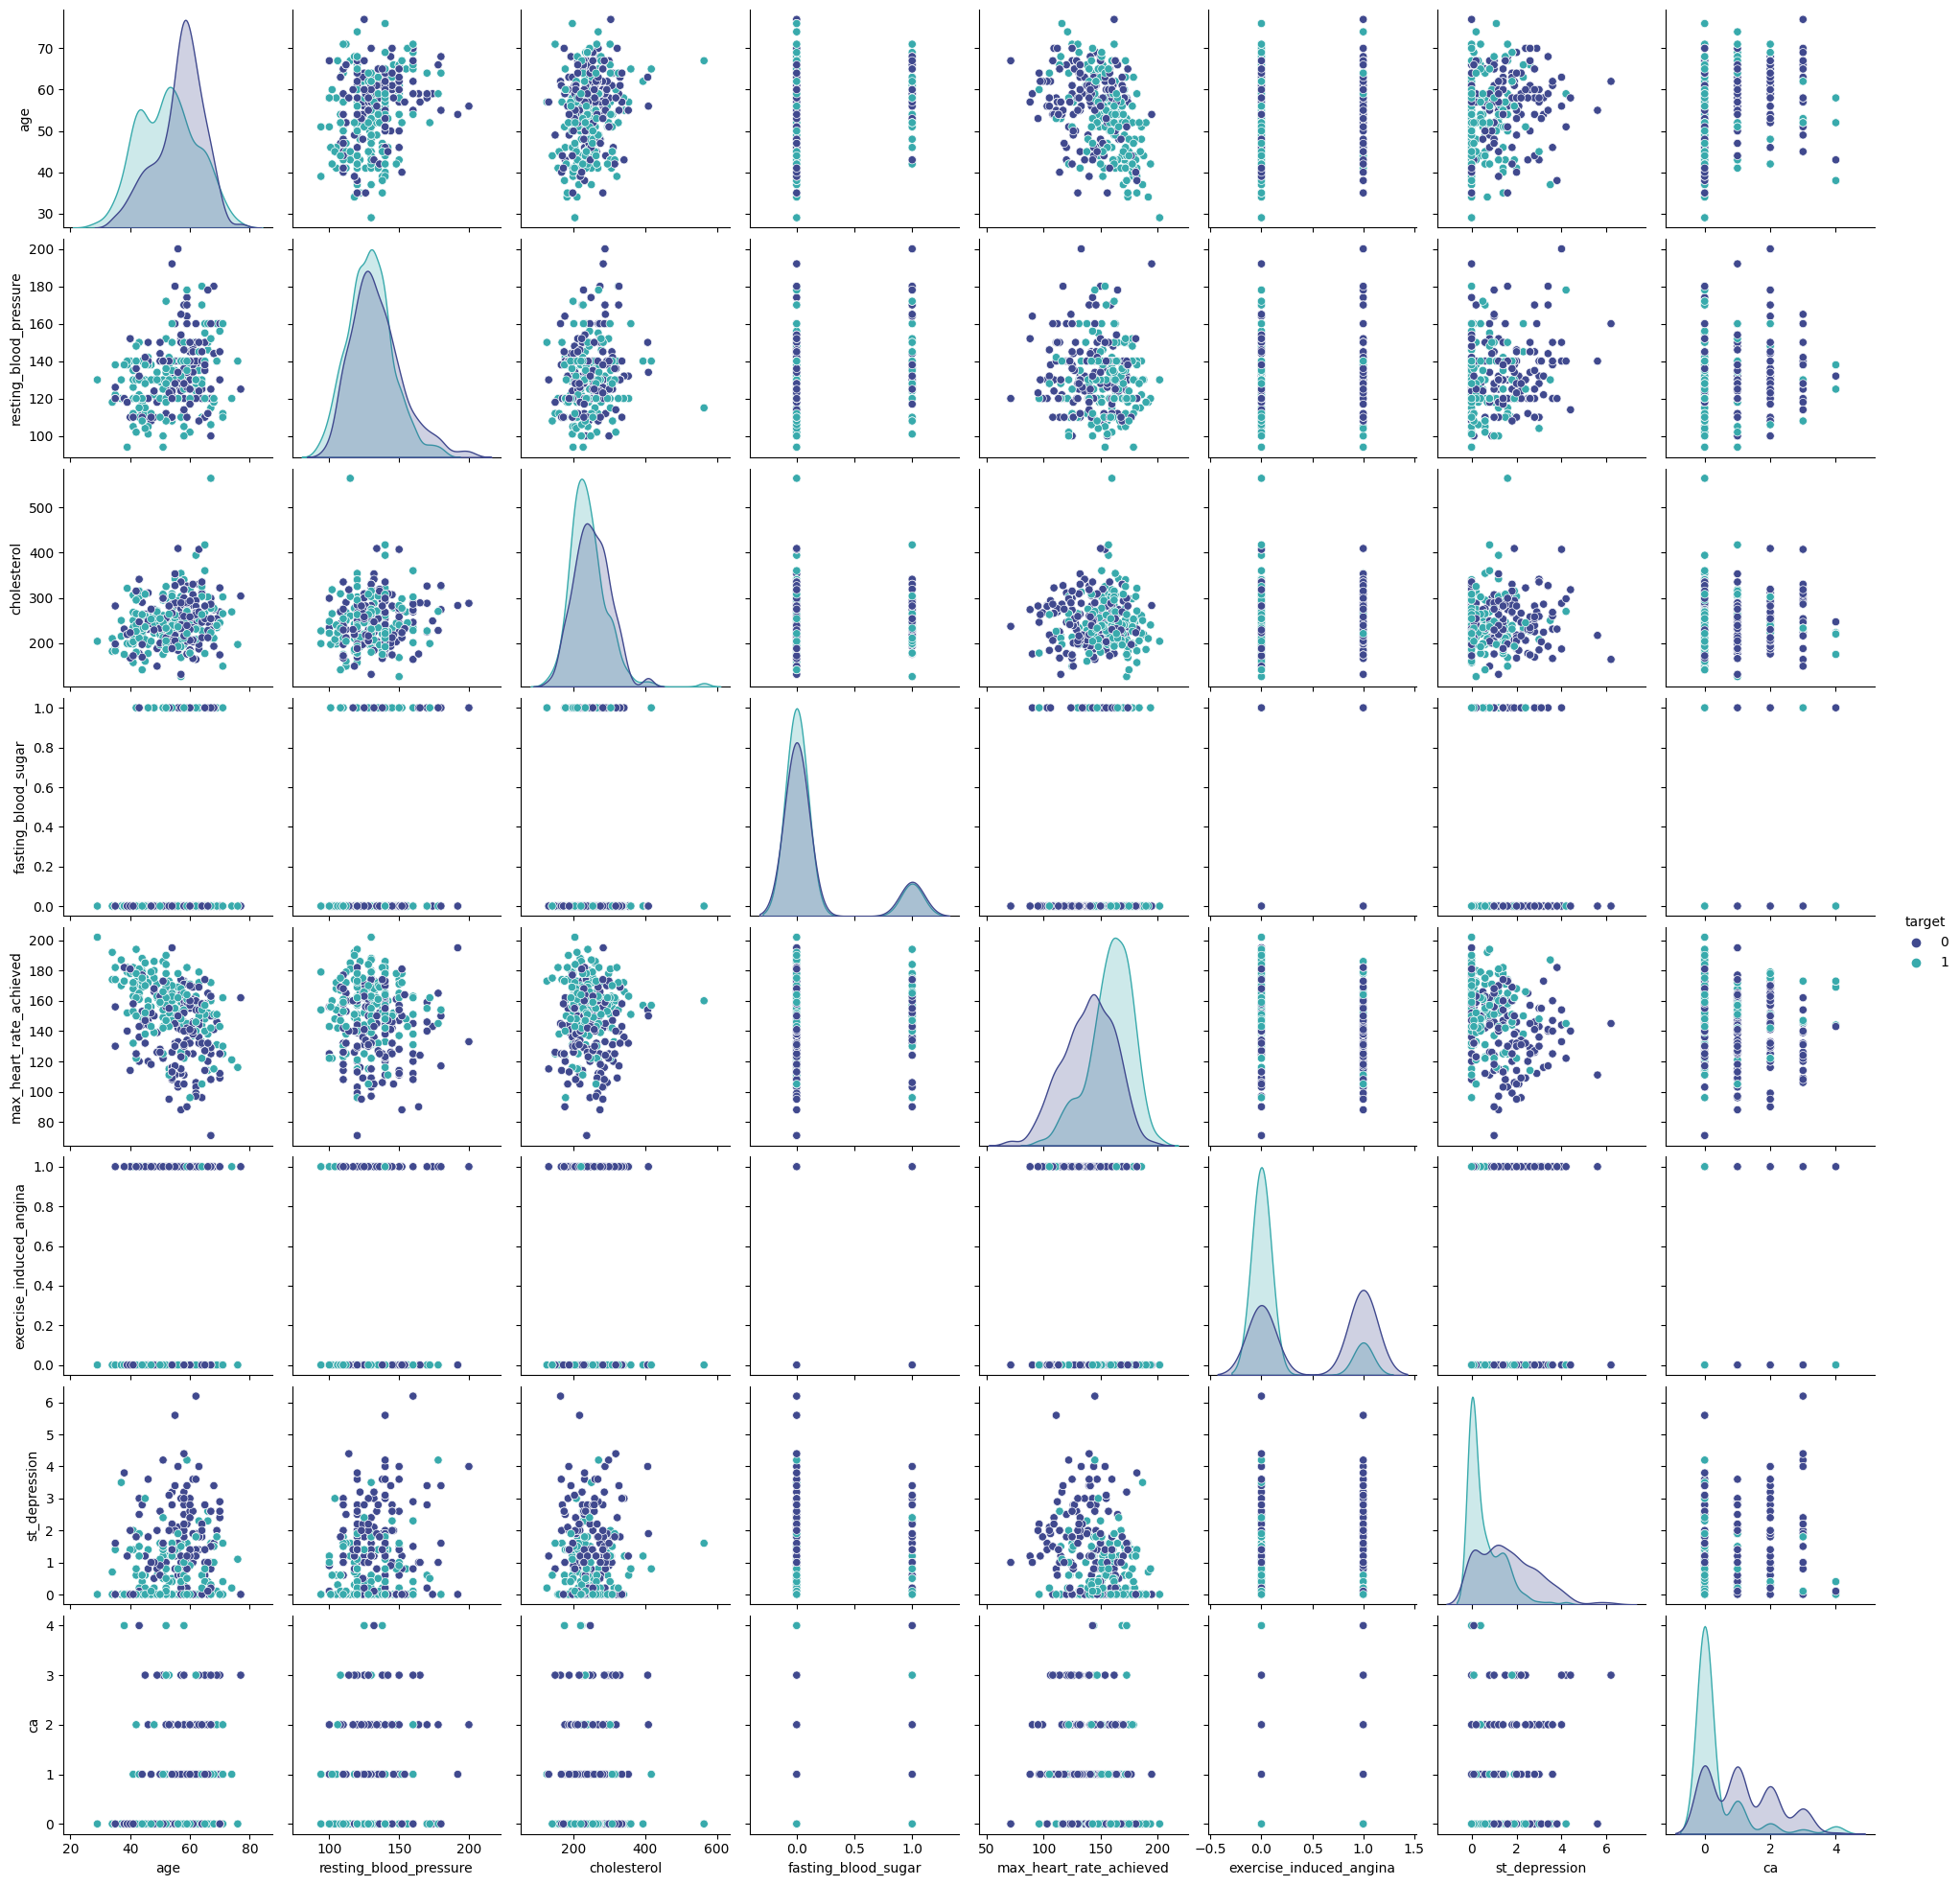

In [ ]:
sns.pairplot(df, hue = 'target',palette = 'mako' )

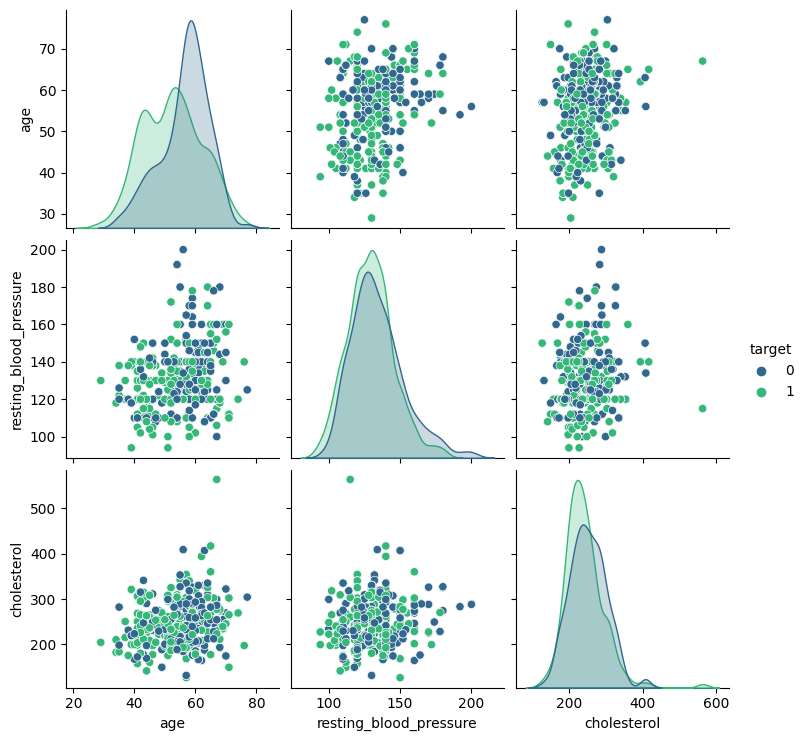

In [ ]:
sns.pairplot(df, hue = 'target', vars = ['age', 'resting_blood_pressure', 'cholesterol'], palette ='viridis' )

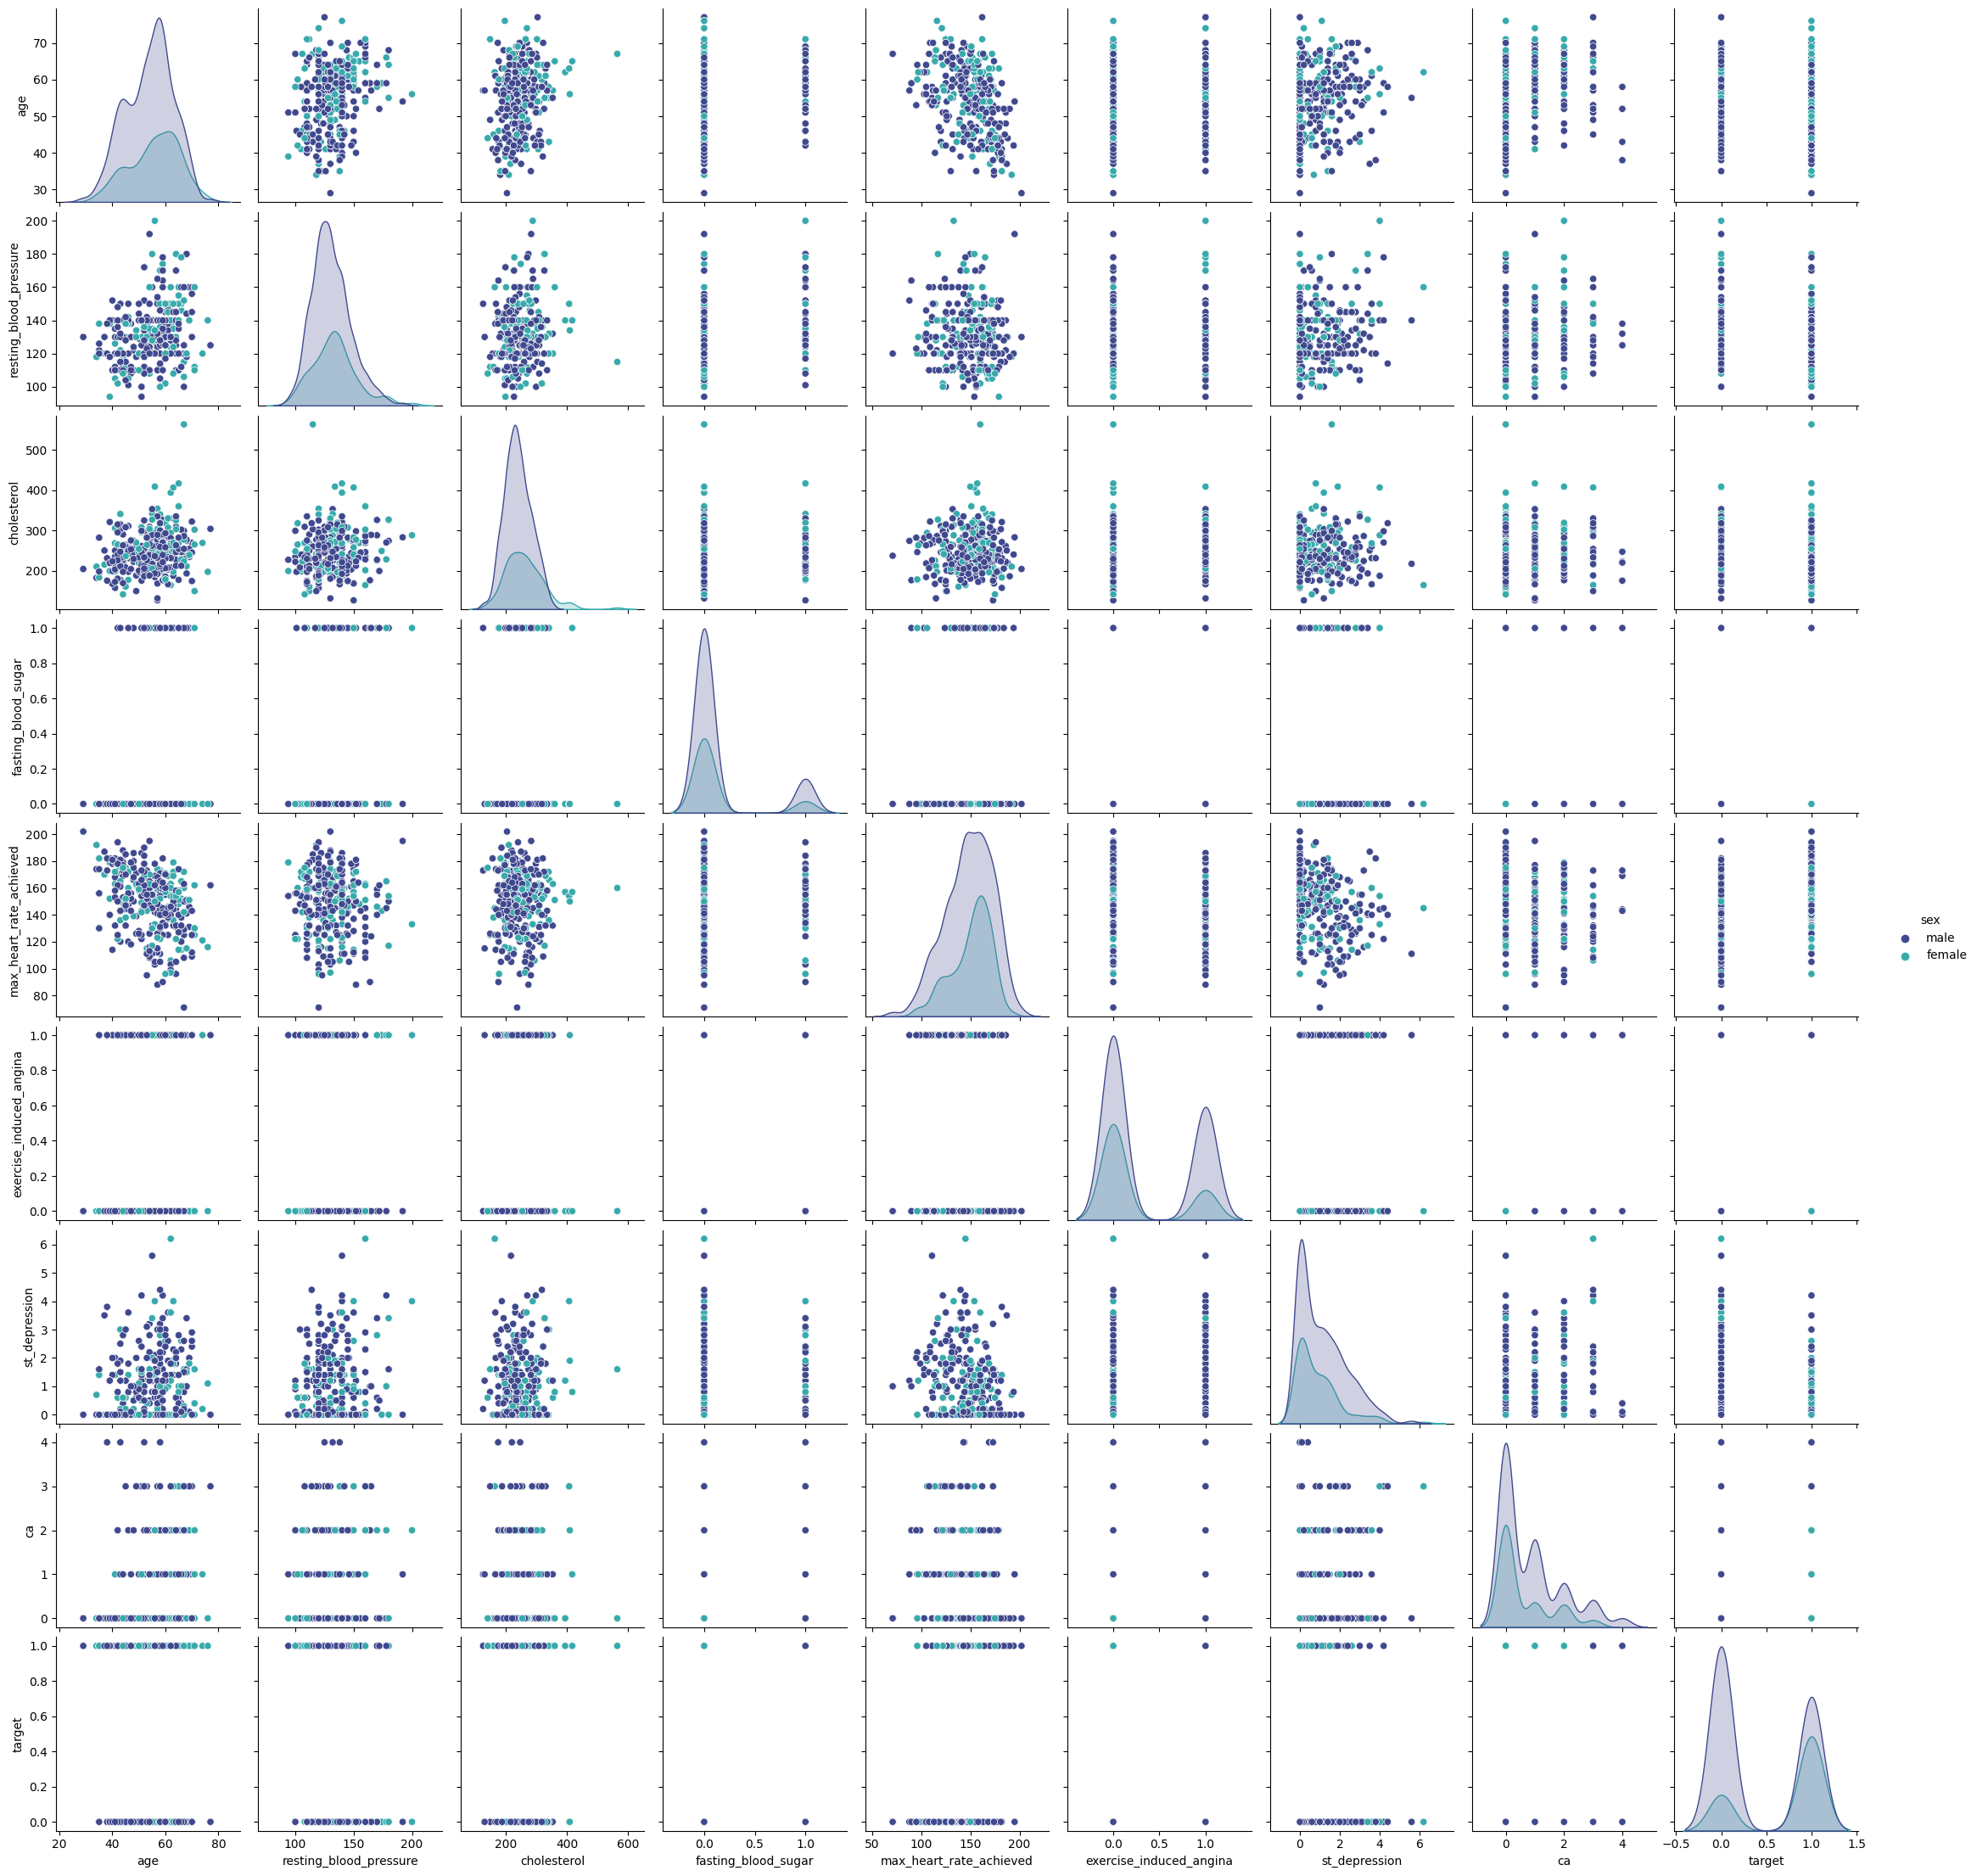

In [ ]:
sns.pairplot(df, hue ='sex',palette = 'mako' )

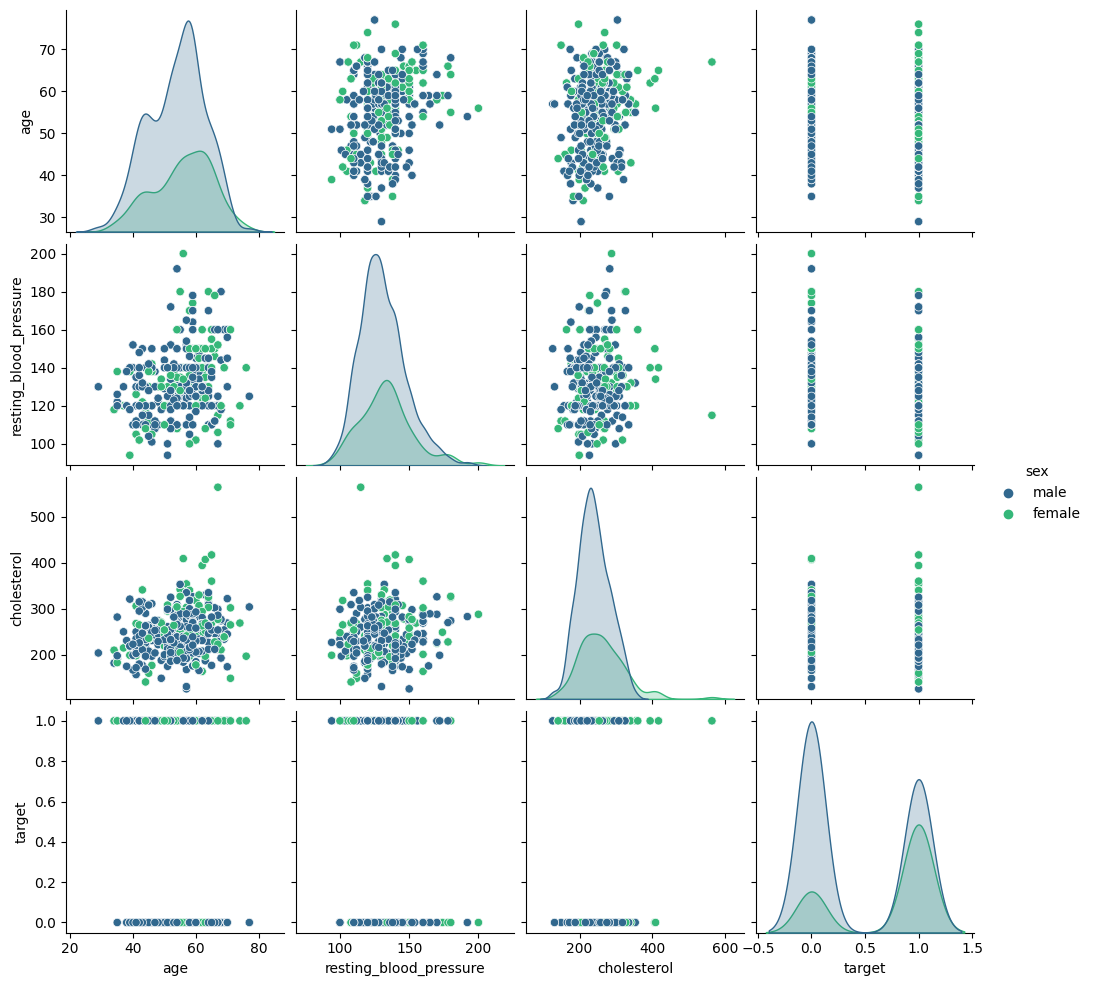

In [ ]:
sns.pairplot(df, hue = 'sex', vars = ['age', 'resting_blood_pressure', 'cholesterol', 'target'], palette ='viridis' )

<Axes: xlabel='resting_blood_pressure', ylabel='cholesterol'>

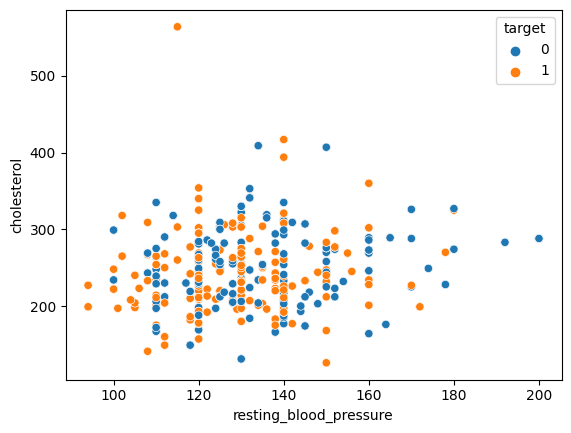

In [ ]:
sns.scatterplot(x = 'resting_blood_pressure', y = 'cholesterol', hue = 'target', data = df)

<Axes: xlabel='resting_blood_pressure', ylabel='age'>

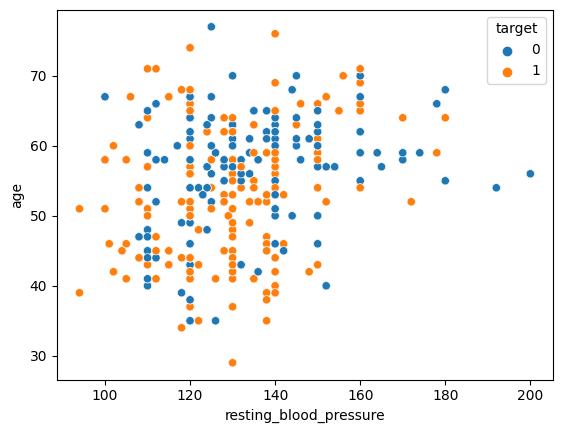

In [ ]:
sns.scatterplot(x = 'resting_blood_pressure', y = 'age', hue = 'target', data = df)

In [ ]:
df = pd.get_dummies(df, drop_first=True)
df.head()

,age,resting_blood_pressure,cholesterol,fasting_blood_sugar,max_heart_rate_achieved,exercise_induced_angina,st_depression,ca,target,sex_male,chest_pain_type_atypical angina,chest_pain_type_non-angina pain,chest_pain_type_typical angina,rest_ecg_left ventricular hypertrophy,rest_ecg_normal,st_slope_flat,st_slope_upsloping,thalassemia_normal blood flow,thalassemia_null,thalassemia_reversible defect
0,52,125,212,0,168,0,1.0,2,0,1,0,0,1,0,0,0,0,0,0,1
1,53,140,203,1,155,1,3.1,0,0,1,0,0,1,0,1,0,1,0,0,1
2,70,145,174,0,125,1,2.6,0,0,1,0,0,1,0,0,0,1,0,0,1
3,61,148,203,0,161,0,0.0,1,0,1,0,0,1,0,0,0,0,0,0,1
4,62,138,294,1,106,0,1.9,3,0,0,0,0,1,0,0,1,0,1,0,0


In [ ]:
df.shape

(1025, 20)

In [ ]:
x = df.drop(['target'],axis=1)
y = df['target']

## Kiểm tra tương quan

<Axes: title={'center': 'Correlation with Diabetes'}>

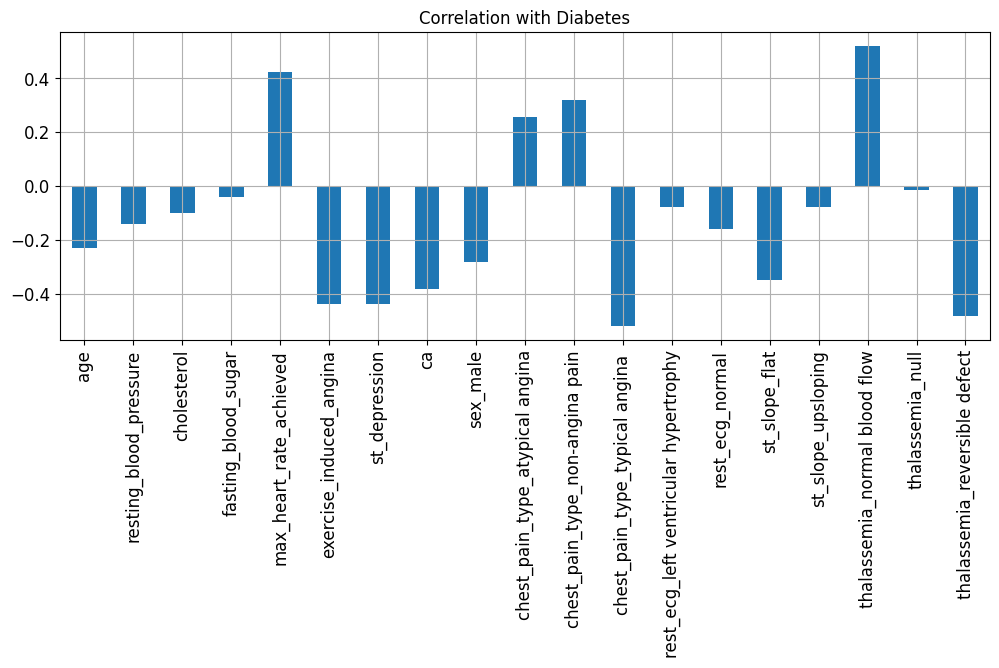

In [ ]:
x.corrwith(y).plot.bar(
        figsize = (12, 4), title = "Correlation with Diabetes", fontsize = 12,
        rot = 90, grid = True)

In [ ]:
# Chia dữ liệu thành tập train/test theo tỉ lệ 8/2
x_train, x_test, y_train, y_test = train_test_split(
   x,y, test_size=0.2, random_state=9
)

In [ ]:
print(x.shape,x_train.shape, x_test.shape)

(1025, 19) (820, 19) (205, 19)


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train[['age','resting_blood_pressure','cholesterol','max_heart_rate_achieved','st_depression']] = scaler.fit_transform(x_train[['age','resting_blood_pressure','cholesterol','max_heart_rate_achieved','st_depression']])
x_train.head()

,age,resting_blood_pressure,cholesterol,fasting_blood_sugar,max_heart_rate_achieved,exercise_induced_angina,st_depression,ca,sex_male,chest_pain_type_atypical angina,chest_pain_type_non-angina pain,chest_pain_type_typical angina,rest_ecg_left ventricular hypertrophy,rest_ecg_normal,st_slope_flat,st_slope_upsloping,thalassemia_normal blood flow,thalassemia_null,thalassemia_reversible defect
641,0.562500,0.377358,0.646119,0,0.603053,1,0.306452,2,0,0,0,1,0,1,1,0,0,0,1
27,0.604167,0.396226,0.440639,1,0.618321,0,0.000000,2,0,1,0,0,0,1,0,0,1,0,0
81,0.416667,0.226415,0.052511,0,0.419847,0,0.129032,3,1,0,1,0,0,1,0,0,1,0,0
821,0.687500,0.433962,0.324201,0,0.679389,0,0.580645,2,0,0,0,1,0,1,0,1,1,0,0
311,0.395833,0.339623,0.296804,1,0.603053,1,0.000000,2,1,0,0,1,0,1,0,0,0,0,1


In [ ]:
x_test[['age','resting_blood_pressure','cholesterol','max_heart_rate_achieved','st_depression']] = scaler.transform(x_test[['age','resting_blood_pressure','cholesterol','max_heart_rate_achieved','st_depression']])
x_test.head()

,age,resting_blood_pressure,cholesterol,fasting_blood_sugar,max_heart_rate_achieved,exercise_induced_angina,st_depression,ca,sex_male,chest_pain_type_atypical angina,chest_pain_type_non-angina pain,chest_pain_type_typical angina,rest_ecg_left ventricular hypertrophy,rest_ecg_normal,st_slope_flat,st_slope_upsloping,thalassemia_normal blood flow,thalassemia_null,thalassemia_reversible defect
80,0.437500,0.433962,0.244292,0,0.702290,0,0.096774,1,1,0,1,0,0,0,1,0,0,0,1
441,0.645833,0.433962,0.381279,0,0.755725,0,0.193548,2,1,0,0,1,0,1,1,0,0,0,1
2,0.854167,0.481132,0.109589,0,0.412214,1,0.419355,0,1,0,0,1,0,0,0,1,0,0,1
128,0.479167,0.415094,0.221461,0,0.748092,0,0.000000,4,1,0,1,0,0,0,0,0,1,0,0
451,0.416667,0.377358,0.331050,0,0.694656,0,0.000000,0,0,1,0,0,0,0,1,0,1,0,0


## Naive Bayes (NB)

In [ ]:
# Sử dụng thuật toán Naive Bayes
NB_Model = GaussianNB()

# Huấn luyện mô hình trên tập train
NB_Model = NB_Model.fit(x_train, y_train)

# Thực hiện dự đoán trên tập test
y_pred_nb = NB_Model.predict(x_test)

## Support vector machine (SVM)

In [ ]:
# Sử dụng thuật toán Support Vector Machine
SVM_model = SVC(C = 1000, gamma = 1, kernel = 'rbf')

#Huấn luyện mô hình trên tập train
SVM_model = SVM_model.fit(x_train, y_train)

#Thực hiện dự đoán trên tập test
y_pred_svm = SVM_model.predict(x_test)

##Logistic regression (LR)

In [ ]:
# Sử dụng thuật toán Logistic Regression
logModel = LogisticRegression()

# Huấn luyện mô hình trên tập train
logModel.fit(x_train, y_train)

# Thực hiện dự đoán trên tập test
y_pred_lr = logModel.predict(x_test)

##Random forest (RF)

In [ ]:
# Sử dụng thuật toán Random Forest
clf = RandomForestClassifier(n_estimators = 100)

# Huấn luyện mô hình trên tập train
# Hàm fit được sử dụng để huấn luyện mô hình bằng cách sử dụng tập train làm tham số
clf.fit(x_train, y_train)

# Thực hiện dự đoán trên tập test
y_pred_rf = clf.predict(x_test)


## Adaboost

In [ ]:
ada = AdaBoostClassifier(n_estimators=50)
ada.fit(x_train, y_train)
y_pred_ada = ada.predict(x_test)

## Đánh giá mô hình

In [ ]:
data = {
        'Naive Bayes': y_pred_nb
        ,'Support vector machine ': y_pred_svm
        ,'Logistic regression': y_pred_lr
        ,'Random forest': y_pred_rf
        ,'Adaboost': y_pred_ada
        }

models = pd.DataFrame(data)
model_results = pd.DataFrame()

for column in models:

    # Ma trận nhầm lẫn
    CM=confusion_matrix(y_test, models[column])

    # True negatives
    TN = CM[0][0]
    # False negatives
    FN = CM[1][0]
    # True positives
    TP = CM[1][1]
    # False positives
    FP = CM[0][1]

    # Tính toán các độ đo
    accuracy = accuracy_score(y_test, models[column])
    sensitivity = recall_score(y_test, models[column])
    specificity = (TN / (TN + FP))
    precision = precision_score(y_test, models[column])
    f_measure = f1_score(y_test, models[column])

    results = pd.DataFrame([[column,accuracy, sensitivity, specificity, precision, f_measure]], columns = ['Model', 'Accuracy','Sensitivity', 'Specificity', 'Precision','F-Measure'])
    model_results = model_results.append(results, ignore_index = True)

model_results

,Model,Accuracy,Sensitivity,Specificity,Precision,F-Measure
0,Naive Bayes,0.863415,0.895652,0.822222,0.865546,0.880342
1,Support vector machine,0.985366,0.973913,1.000000,1.000000,0.986784
2,Logistic regression,0.887805,0.913043,0.855556,0.889831,0.901288
3,Random forest,0.985366,0.973913,1.000000,1.000000,0.986784
4,Adaboost,0.931707,0.930435,0.933333,0.946903,0.938596
